 ## Grp member Name: 1) Rashmi Narkhede.
  ## 2) Neha Kolte.
  ## 3) Chanchal Kabra.
  ## 4) Ashwini Patil.
  ## 5) Subham Chaudhari
  
  
    

# Distance Measures for Machine Learning
The first step is to calculate the distance between the new point and each training point. There are various methods for calculating this distance, of which the most commonly known methods are *__Euclidian__*, *__Manhattan__* (for continuous) and *__Hamming distance__* (for categorical).

## Minkowski Distance:


*__Minkowski Distance__*: $$\left(\sum_{i=1}^k |x_i-y_i|^p\right)^\frac{1}{p}$$

Some common values of ‘p’ are:-

p = 1, Manhattan Distance

p = 2, Euclidean Distance

p = infinity, Chebychev Distance

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

## Dataset Of BMD   

### Here the dataset contain age, sex, fracture	, weight, height ,	medication and waiting_time	

In [4]:
dataset=pd.read_csv("bmd.csv")
dataset.head


<bound method NDFrame.head of         id        age sex     fracture  weight_kg  height_cm      medication  \
0      469  57.052768   F  no fracture       64.0      155.5  Anticonvulsant   
1     8724  75.741225   F  no fracture       78.0      162.0   No medication   
2     6736  70.778900   M  no fracture       73.0      170.5   No medication   
3    24180  78.247175   F  no fracture       60.0      148.0   No medication   
4    17072  54.191877   M  no fracture       55.0      161.0   No medication   
..     ...        ...  ..          ...        ...        ...             ...   
164  21892  77.982543   M     fracture       74.0      164.0   No medication   
165  24140  50.285303   F     fracture       59.0      161.0   No medication   
166   6969  46.359721   M     fracture       67.0      169.0   No medication   
167   5505  54.788368   M     fracture       70.0      166.0   No medication   
168     71  69.994822   F     fracture       68.5      165.0   No medication   

     wait

## Split the data

In [4]:
X=np.array(dataset["age"]).reshape(-1,1)          # Feature
Y=dataset["bmd"]

In [ ]:
X_train,X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3)

## Scale the Data

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#dataset["age"]

In [20]:
X_test.size

51

## Create and Train the Model

In [21]:
model=KNeighborsRegressor(n_neighbors=12)

model.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=12)

## Predict the model and find best K

In [8]:
Y_pred=model.predict(X_test)
mean_squared_error(Y_test,Y_pred)

0.02328377545726569

In [9]:
error=[]
k_list=list(range(1,20,1))
for k in k_list:
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    error.append(mean_squared_error(Y_test,Y_pred))
    
best_k=k_list[error.index(min(error))]
print("Best k",best_k,": Error:-",error[best_k])


Best k 17 : Error:- 0.023142716133988564


## Plot K Vs Mean Square Error

Text(17, 0.024142716133988565, 'Best k=17')

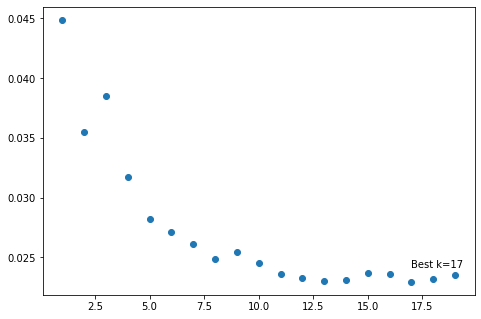

In [23]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(k_list,error)
ax.annotate("Best k=%s"%str(best_k),xy=(best_k,error[best_k]+0.001))

## What is a classifier?
A classifier is a machine learning model that is used to discriminate different objects based on certain features.

## Principle of Naive Bayes Classifier:
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

## Types of Naive Bayes Classifier:
### Multinomial Naive Bayes:
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

## Bernoulli Naive Bayes:
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.



## Gaussian Naive Bayes:
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

$$P(x_i|y)=\frac{1}{\sqrt{2\pi \sigma^2_y}} e^{\left(\frac{-\left(x_i-\mu_y\right)^2}{2\sigma_y^2}\right)}$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

## ## Importing data sets

In [ ]:


dataset=pd.read_csv("Social_Network_ads.csv")
X=dataset.iloc[:,1:-1]
y=dataset.iloc[:,-1]
dataset
X

## Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
X_train.head()

## Feature Scaling

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Training Naive Baye's Classifier¶

In [ ]:
classifier=GaussianNB()
classifier.fit(X_train,y_tr

## Prediction

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

## Confusion Matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
accuracy_score(y_test,y_pred)

 ## Applications
Naive Bayes algorithms are mostly used in sentiment analysis, spam filtering, recommendation systems etc. They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. In most of the real life cases, the predictors are dependent, this hinders the performance of the classifier.